Steps by steps :
1. Download data
*   Take a Quick look at the data structure
2.  Visualize Data to gain insights
*   Looking for corelation
3. Prepare data for machine learning algorithm
* Data cleaning
* handling text and categorical attributes
4. Select and train a model



In [1]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Download data

In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

#download housing data
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

df = load_housing_data()


Take a Quick look at the data structure

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


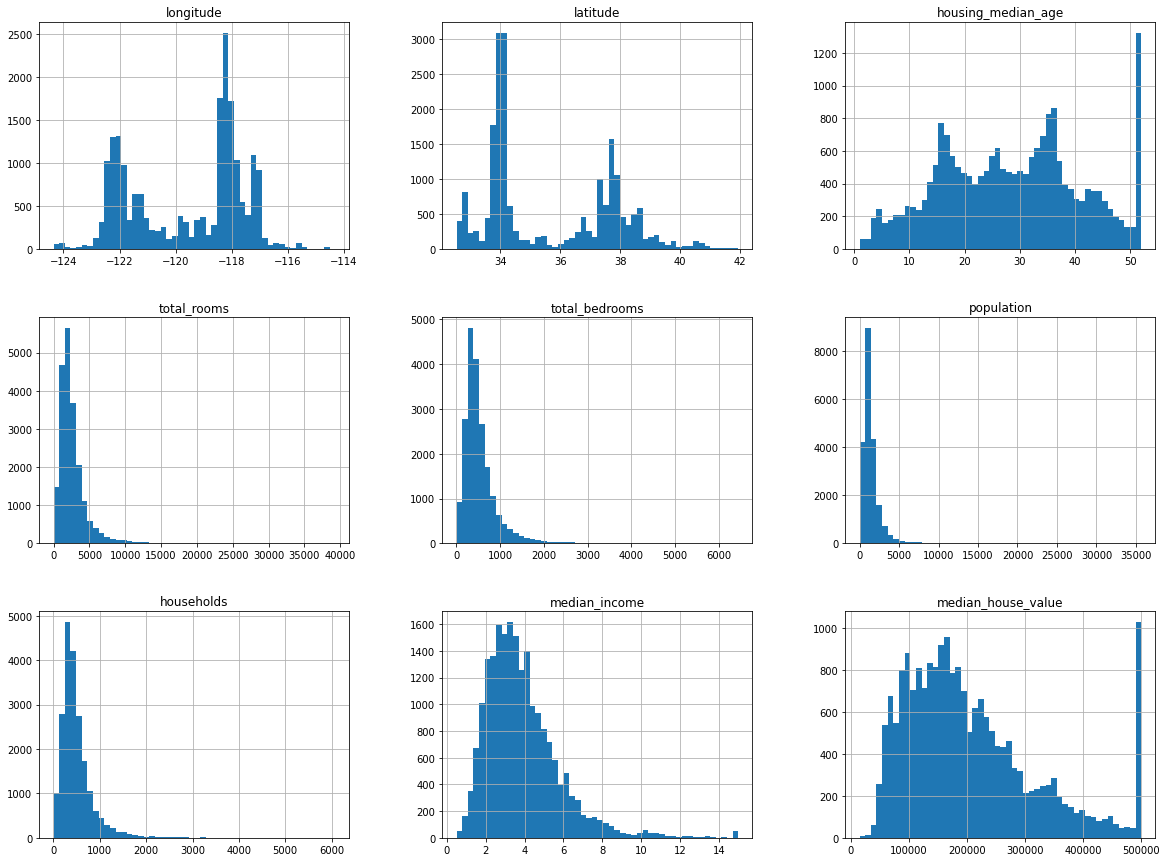

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

## Visualize Data to gain insights

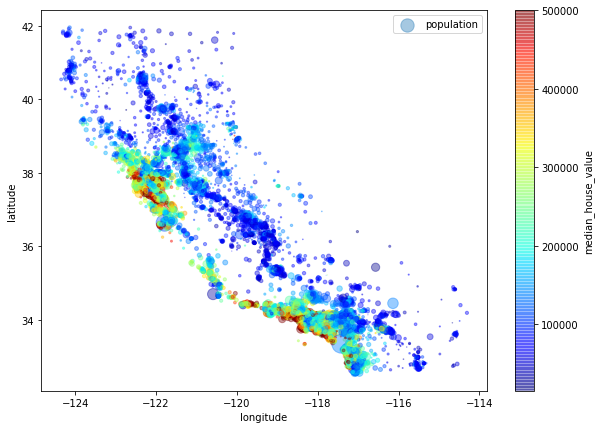

In [7]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=df["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

## Looking for corelation

In [8]:
corr_matrix = df.corr()

In [9]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8aef45bf50>,
      dtype=object)

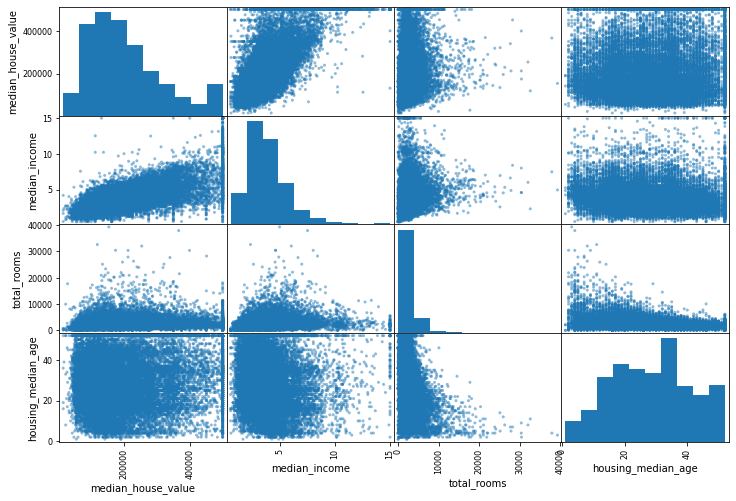

In [10]:
# display the corelation
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8))

## Make new features 

In [11]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]= df["population"]/df["households"]

In [12]:
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

Data Cleaning

In [13]:
#check if there is 0 values
df.isna().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64

In [14]:
median = df["total_bedrooms"].median()  
df["total_bedrooms"].fillna(median, inplace=True)

In [15]:
median = df["bedrooms_per_room"].median()  
df["bedrooms_per_room"].fillna(median, inplace=True)

In [16]:
df.isna().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

Onehot encoding the Ocean_proximity feature

In [17]:
# housing_cat = df[["ocean_proximity"]]
# housing_cat

In [18]:
# from sklearn.preprocessing import OneHotEncoder

# cat_encoder = OneHotEncoder(sparse=False)
# housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
# housing_cat_1hot

In [19]:
# cat_encoder.categories_

In [20]:
# housing_onehot = pd.DataFrame({})

In [21]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


In [22]:
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.254632
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8aed676b10>,
      dtype=object)

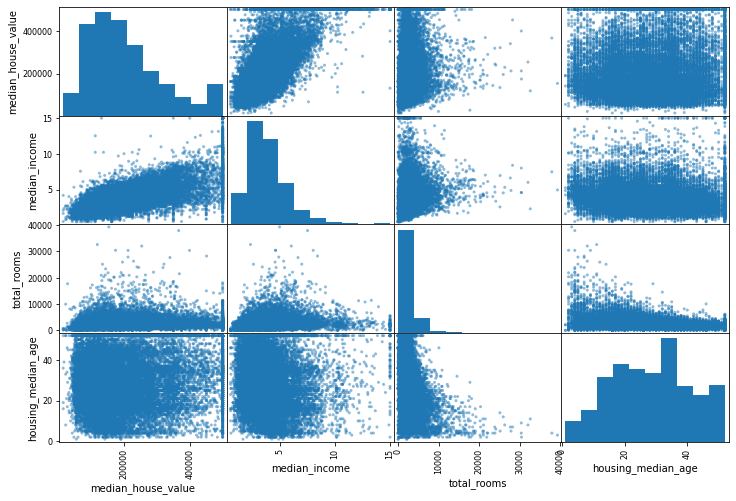

In [23]:
# display the corelation
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8))

In [48]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits

In [34]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ["longitude", "latitude", "housing_median_age", "total_bedrooms", "population", "households", "median_income", "rooms_per_household", "bedrooms_per_room", "population_per_household"]),
    (OneHotEncoder(handle_unknown="ignore"), ["ocean_proximity"])
)

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [75]:
import tensorflow as tf

tf.random.set_seed(42)

# Create a new model (same as model_2)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=11, activation='relu',), # 100 units
  tf.keras.layers.Dense(units=50, activation='relu',), # 10 units
  tf.keras.layers.Dense(units=50, activation='relu',),
  tf.keras.layers.Dense(units=10, activation='relu',),
  tf.keras.layers.Dense(units=9, activation='relu',),
  tf.keras.layers.Dense(units=8, activation='relu',),
  tf.keras.layers.Dense(units=1, activation='relu',),

])


# Compile the model
model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# Fit the model
model.fit(X_train_normal, y_train, epochs=500)

Epoch 1/500
516/516 [==============================] - 3s 4ms/step - loss: 131073.4375 - mae: 131073.4375
Epoch 2/500
516/516 [==============================] - 2s 4ms/step - loss: 67343.1250 - mae: 67343.1250
Epoch 3/500
516/516 [==============================] - 1s 3ms/step - loss: 59908.4023 - mae: 59908.4023
Epoch 4/500
516/516 [==============================] - 1s 3ms/step - loss: 54357.3750 - mae: 54357.3750
Epoch 5/500
516/516 [==============================] - 1s 3ms/step - loss: 52001.8633 - mae: 52001.8633
Epoch 6/500
516/516 [==============================] - 1s 3ms/step - loss: 50889.1680 - mae: 50889.1680
Epoch 7/500
516/516 [==============================] - 3s 5ms/step - loss: 50153.3281 - mae: 50153.3281
Epoch 8/500
516/516 [==============================] - 2s 3ms/step - loss: 49583.8359 - mae: 49583.8359
Epoch 9/500
516/516 [==============================] - 1s 3ms/step - loss: 49026.3320 - mae: 49026.3320
Epoch 10/500
516/516 [==============================] - 1s 3ms

In [54]:
preds = model.predict(X_test_normal)

129/129 [==============================] - 0s 1ms/step


In [55]:
preds[:-5]

array([[ 84444.92 ],
       [240051.73 ],
       [405009.47 ],
       ...,
       [228637.73 ],
       [428325.9  ],
       [ 69320.625]], dtype=float32)

In [56]:
y_test[:-5]

20046     65600.0
3024     353400.0
15663    466700.0
20484    500001.0
9814     286100.0
           ...   
4653      98300.0
1783     500001.0
7608     151900.0
0        452600.0
10155     70700.0
Name: median_house_value, Length: 4123, dtype: float64

In [57]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_normal, y_train)

LinearRegression()

In [58]:
lin_reg.score(X_test_normal, y_test)

0.6582987644349155

In [59]:
lin_preds = lin_reg.predict(X_test_normal)

In [60]:
lin_preds[:5]

array([ 34593.34967343, 257948.4867393 , 383876.32065646, 298740.77950591,
       244940.53003962])

In [61]:
y_test[:5]

20046     65600.0
3024     353400.0
15663    466700.0
20484    500001.0
9814     286100.0
Name: median_house_value, dtype: float64

In [62]:
from sklearn.metrics import mean_squared_error
import numpy as np

lin_mse = mean_squared_error(lin_preds, y_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68824.8321484342

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


## Try using a lot of models

In [66]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [67]:
models = {
    'SVR':SVR(),
    'XGBRegressor':XGBRegressor(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'SGDRegressor':SGDRegressor(),
    'BayesianRidge':BayesianRidge(),
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor()
}

In [68]:
from sklearn.metrics import mean_squared_error

In [69]:
X_train_normal

array([[0.71015936, 0.02231668, 0.64705882, ..., 0.        , 0.        ,
        1.        ],
       [0.72908367, 0.01594049, 0.17647059, ..., 0.        , 0.        ,
        1.        ],
       [0.20717131, 0.55260361, 0.52941176, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.5       , 0.39744952, 0.29411765, ..., 0.        , 0.        ,
        0.        ],
       [0.71314741, 0.16365569, 0.41176471, ..., 0.        , 0.        ,
        0.        ],
       [0.54681275, 0.17853348, 0.41176471, ..., 0.        , 0.        ,
        0.        ]])

In [70]:
y_train

14196    291000.0
8267     156100.0
17445    353900.0
14265    241200.0
2271      53800.0
           ...   
11284     71600.0
11964    379300.0
5390     104200.0
860       84700.0
15795    251400.0
Name: median_house_value, Length: 16512, dtype: float64

In [72]:
model_results = []
model_names = []

# training the model with function
for name,model in models.items():
    a = model.fit(X_train_normal, y_train)
    predicted = a.predict(X_test_normal)
    score = np.sqrt(mean_squared_error(y_test, predicted))
    model_results.append(score)
    model_names.append(name)
    
    #creating dataframe
    df_results = pd.DataFrame([model_names,model_results])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model',1:'RMSE'}).sort_values(by='RMSE',ascending=False)
    
print(df_results)

[03:52:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                   Model           RMSE
0                    SVR  121021.381544
3             ElasticNet   107794.98277
4           SGDRegressor   70964.859169
2                  Ridge   69411.540474
5          BayesianRidge   68837.885393
6       LinearRegression   68824.832148
1           XGBRegressor    53907.27715
7  RandomForestRegressor   50780.878928
